In [176]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [177]:
df=pd.read_csv("../Integrated_data/all_dataset2.csv",encoding="utf-8")

In [178]:
df

,ID,collect_datetime,gender,grade,height,weight,step_count,burned calory,eat_calory,Sleep_time,before_height,before_weight,before_waist,after_height,after_weight,after_waist,bmi,waist_bmi
0,#AAGQKY,2022-07-14,2.0,4.0,148.0,45.15,72.0,8.877,2000.0,12.0,148.0,45.3,-,148.0,45.0,NaN,20.612673,0.306081
1,#AAGQKY,2022-07-15,2.0,4.0,148.0,45.15,72.0,8.877,2000.0,12.0,148.0,45.3,-,148.0,45.0,NaN,20.612673,0.306081
2,#AAGQKY,2022-07-16,2.0,4.0,148.0,45.15,72.0,8.877,2000.0,12.0,148.0,45.3,-,148.0,45.0,NaN,20.612673,0.306081
3,#AAGQKY,2022-07-17,2.0,4.0,148.0,45.15,72.0,8.877,2000.0,12.0,148.0,45.3,-,148.0,45.0,NaN,20.612673,0.306081
4,#AAGQKY,2022-07-18,2.0,4.0,148.0,45.15,72.0,8.877,2000.0,12.0,148.0,45.3,-,148.0,45.0,NaN,20.612673,0.306081
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59509,#ZZLSSL,2023-01-07,1.0,6.0,153.0,68.00,2103.0,38.812,521.0,442.0,153.0,68.0,-,164.2,69.1,91.1,29.048656,0.444444
59510,#ZZLSSL,2023-01-08,1.0,6.0,153.0,68.00,2103.0,38.812,521.0,442.0,153.0,68.0,-,164.2,69.1,91.1,29.048656,0.444444
59511,#ZZLSSL,2023-01-09,1.0,6.0,153.0,68.00,2103.0,38.812,521.0,442.0,153.0,68.0,-,164.2,69.1,91.1,29.048656,0.444444
59512,#ZZLSSL,2023-01-10,1.0,6.0,153.0,68.00,2103.0,38.812,521.0,442.0,153.0,68.0,-,164.2,69.1,91.1,29.048656,0.444444


### 초기에 측정한 상태 데이터 세트

In [179]:
df_init=df[df['collect_datetime']=='2022-07-14']

In [180]:
df_init.reset_index(drop=True, inplace=True)

In [181]:
temp_init=df_init.iloc[:,[2,3,4,5,6,7,8,9,16,17]]

In [182]:
temp_init.isnull().sum()

gender           0
grade            0
height           0
weight           0
step_count       0
burned calory    0
eat_calory       0
Sleep_time       0
bmi              0
waist_bmi        3
dtype: int64

In [183]:
temp_init['waist_bmi'].fillna(temp_init[(temp_init.bmi>20) & (temp_init.bmi<24)]['waist_bmi'].mean(),inplace=True)

C:\Users\jaemin\Anaconda3\envs\jm\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [184]:
temp_init

,gender,grade,height,weight,step_count,burned calory,eat_calory,Sleep_time,bmi,waist_bmi
0,2.0,4.0,148.000000,45.15,72.0,8.877,2000.0,12.0,20.612673,0.306081
1,2.0,4.0,136.016667,28.10,10079.0,8.877,2000.0,12.0,15.188751,0.208063
2,2.0,4.0,132.000000,29.00,100.0,8.877,421.0,12.0,16.643710,0.206439
3,1.0,5.0,136.100000,31.80,67.0,8.877,481.0,432.0,17.167651,0.255694
4,2.0,6.0,148.000000,39.00,200.0,8.877,748.0,432.0,17.804967,0.263514
...,...,...,...,...,...,...,...,...,...,...
322,1.0,5.0,148.000000,36.00,6966.0,97.573,976.0,500.0,16.435354,0.233784
323,1.0,4.0,139.000000,45.00,6966.0,97.573,976.0,500.0,23.290720,0.325742
324,1.0,4.0,121.100000,24.00,90.0,59.462,250.0,186.0,16.365262,0.203964
325,2.0,6.0,156.700000,47.90,3021.0,33.915,238.0,438.0,19.507316,0.319081


# 군집화

In [210]:
kmeans=KMeans(n_clusters=4,init='k-means++',max_iter=300,random_state=0).fit(temp_init)

In [211]:
print(kmeans.labels_)
print(kmeans.cluster_centers_)
print(kmeans.n_iter_)

[0 1 0 0 0 1 3 3 0 0 0 0 0 0 3 3 0 0 0 0 3 3 0 0 3 3 3 3 3 1 1 0 0 0 0 0 3
 3 3 3 1 1 0 3 0 3 0 0 3 3 0 0 0 0 0 3 0 0 0 0 0 0 3 0 0 0 3 0 0 0 3 3 3 0
 0 0 0 0 0 0 3 0 0 0 0 0 0 3 0 0 0 1 0 0 0 0 0 3 0 0 0 0 1 0 3 3 0 0 0 0 0
 3 3 3 3 0 0 3 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 3 3 3 0 0 1 0 0 0 0 0 0 0 0 0
 0 1 1 3 3 3 0 0 0 3 3 0 0 0 1 0 0 0 0 0 0 3 0 0 0 1 1 0 0 3 3 3 3 0 3 0 0
 0 0 1 0 3 3 0 0 0 0 0 0 3 3 3 3 0 0 0 0 3 0 0 0 3 1 1 3 0 3 0 0 0 0 0 0 3
 0 3 3 0 0 0 3 0 3 3 3 0 0 0 3 0 3 2 2 0 0 0 3 0 3 0 3 0 0 0 0 0 0 0 0 3 0
 0 0 0 0 3 3 0 0 0 0 3 3 0 0 0 0 3 0 3 0 0 0 0 0 0 0 0 0 0 0 0 3 3 3 0 0 0
 0 0 0 0 3 0 0 3 3 3 0 0 1 3 3 3 1 1 0 0 1 3 3 0 0 3 3 3 0 0 0]
[[1.59615385e+00 4.84134615e+00 1.46870994e+02 4.08744426e+01
  8.41663462e+02 4.91581282e+01 7.74468750e+02 4.02353365e+02
  1.87526094e+01 2.79639720e-01 2.22044605e-16]
 [1.58333333e+00 5.00000000e+00 1.46517361e+02 3.92041667e+01
  1.39341250e+04 4.42966389e+01 8.03791667e+02 3.29326389e+02
  1.78899757e+01 2.66541233e-01 1.000000

In [212]:
temp_init['cluster'] = kmeans.labels_

C:\Users\jaemin\Anaconda3\envs\jm\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### 군집 찾기

In [213]:
X = np.asarray(temp_init)

dict_keys(['ax', 'colors', 'estimator', 'is_fitted']) 


dict_keys(['ax', 'colors', 'estimator', 'is_fitted']) 




SilhouetteVisualizer(ax=<AxesSubplot:>, colors='yellowbrick',
                     estimator=KMeans())

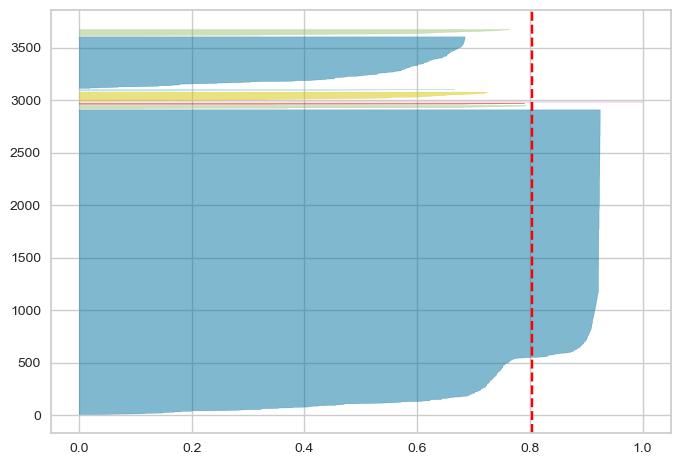

In [214]:
from yellowbrick.cluster import SilhouetteVisualizer 
model = KMeans()
visualizer = SilhouetteVisualizer(model,colors='yellowbrick')
visualizer.fit(X.reshape(-1,1))

### 시각화를 위해 8개 속성을 두개로 차원 축소한 뒤에 개별데이터로 보낸다.

C:\Users\jaemin\Anaconda3\envs\jm\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



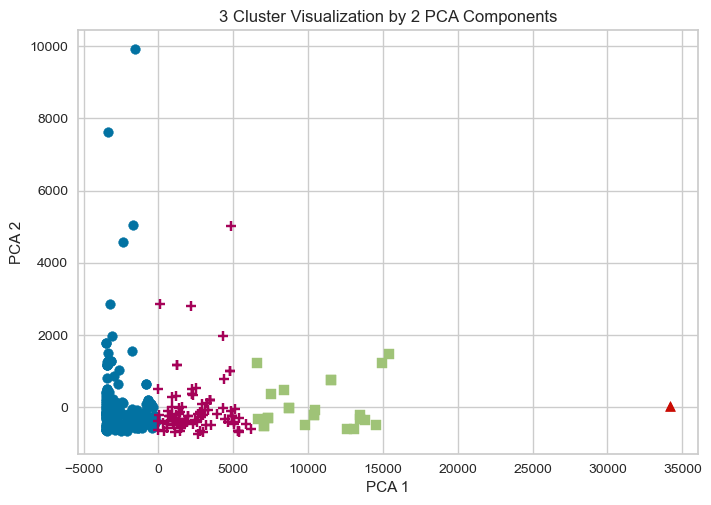

In [215]:
pca = PCA(n_components=4)
pca_transformed = pca.fit_transform(temp_init)

temp_init['pca_x'] = pca_transformed[:,0]
temp_init['pca_y'] = pca_transformed[:,1]

maker0_ind = temp_init[temp_init['cluster']==0].index
maker1_ind = temp_init[temp_init['cluster']==1].index
maker2_ind = temp_init[temp_init['cluster']==2].index
maker3_ind = temp_init[temp_init['cluster']==3].index

plt.scatter(x=temp_init.loc[maker0_ind,'pca_x'], y=temp_init.loc[maker0_ind, 'pca_y'], marker='o')
plt.scatter(x=temp_init.loc[maker1_ind,'pca_x'], y=temp_init.loc[maker1_ind, 'pca_y'], marker='s')
plt.scatter(x=temp_init.loc[maker2_ind,'pca_x'], y=temp_init.loc[maker2_ind, 'pca_y'], marker='^')
plt.scatter(x=temp_init.loc[maker3_ind,'pca_x'], y=temp_init.loc[maker3_ind, 'pca_y'], marker='+')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('3 Cluster Visualization by 2 PCA Components')
plt.show()

In [216]:
df_init.iloc[239:241,:]

,ID,collect_datetime,gender,grade,height,weight,step_count,burned calory,eat_calory,Sleep_time,before_height,before_weight,before_waist,after_height,after_weight,after_waist,bmi,waist_bmi
239,#THZZDB,2022-07-14,2.0,6.0,162.0,45.0,37658.0,67.216,858.0,528.0,161.6,44.8,56,161.8,45.7,63.0,17.146776,0.276543
240,#TIHMOD,2022-07-14,2.0,5.0,150.0,54.0,37658.0,67.216,858.0,528.0,152.3,54.5,65,153.3,53.5,77.2,24.000000,0.363333


# plotly로 군집 분석

In [217]:
temp_init

,gender,grade,height,weight,step_count,burned calory,eat_calory,Sleep_time,bmi,waist_bmi,cluster,pca_x,pca_y
0,2.0,4.0,148.000000,45.15,72.0,8.877,2000.0,12.0,20.612673,0.306081,0,-3413.066736,1242.786835
1,2.0,4.0,136.016667,28.10,10079.0,8.877,2000.0,12.0,15.188751,0.208063,1,6593.881085,1225.132473
2,2.0,4.0,132.000000,29.00,100.0,8.877,421.0,12.0,16.643710,0.206439,0,-3387.875784,-336.251135
3,1.0,5.0,136.100000,31.80,67.0,8.877,481.0,432.0,17.167651,0.255694,0,-3421.745676,-274.484754
4,2.0,6.0,148.000000,39.00,200.0,8.877,748.0,432.0,17.804967,0.263514,0,-3288.269437,-7.712850
...,...,...,...,...,...,...,...,...,...,...,...,...,...
322,1.0,5.0,148.000000,36.00,6966.0,97.573,976.0,500.0,16.435354,0.233784,3,3478.036397,208.280594
323,1.0,4.0,139.000000,45.00,6966.0,97.573,976.0,500.0,23.290720,0.325742,3,3478.036096,208.276186
324,1.0,4.0,121.100000,24.00,90.0,59.462,250.0,186.0,16.365262,0.203964,0,-3398.534261,-506.733735
325,2.0,6.0,156.700000,47.90,3021.0,33.915,238.0,438.0,19.507316,0.319081,0,-468.174687,-522.741862


In [218]:
#temp_init=temp_init.iloc[:,[4,5,6,7,8,9]]

In [219]:
temp_init

,gender,grade,height,weight,step_count,burned calory,eat_calory,Sleep_time,bmi,waist_bmi,cluster,pca_x,pca_y
0,2.0,4.0,148.000000,45.15,72.0,8.877,2000.0,12.0,20.612673,0.306081,0,-3413.066736,1242.786835
1,2.0,4.0,136.016667,28.10,10079.0,8.877,2000.0,12.0,15.188751,0.208063,1,6593.881085,1225.132473
2,2.0,4.0,132.000000,29.00,100.0,8.877,421.0,12.0,16.643710,0.206439,0,-3387.875784,-336.251135
3,1.0,5.0,136.100000,31.80,67.0,8.877,481.0,432.0,17.167651,0.255694,0,-3421.745676,-274.484754
4,2.0,6.0,148.000000,39.00,200.0,8.877,748.0,432.0,17.804967,0.263514,0,-3288.269437,-7.712850
...,...,...,...,...,...,...,...,...,...,...,...,...,...
322,1.0,5.0,148.000000,36.00,6966.0,97.573,976.0,500.0,16.435354,0.233784,3,3478.036397,208.280594
323,1.0,4.0,139.000000,45.00,6966.0,97.573,976.0,500.0,23.290720,0.325742,3,3478.036096,208.276186
324,1.0,4.0,121.100000,24.00,90.0,59.462,250.0,186.0,16.365262,0.203964,0,-3398.534261,-506.733735
325,2.0,6.0,156.700000,47.90,3021.0,33.915,238.0,438.0,19.507316,0.319081,0,-468.174687,-522.741862


In [220]:
temp_init=temp_init[['gender', 'grade', 'height', 'weight', 'step_count', 'burned calory',
       'eat_calory', 'Sleep_time', 'bmi', 'waist_bmi']]

In [221]:
temp_init.columns

Index(['gender', 'grade', 'height', 'weight', 'step_count', 'burned calory',
       'eat_calory', 'Sleep_time', 'bmi', 'waist_bmi'],
      dtype='object')

In [228]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler_ = MinMaxScaler()
scaler_.fit(temp_init)
temp_init_scaled_ = scaler_.transform(temp_init)

import plotly.express as px
fig = px.scatter_matrix(temp_init,width=1200, height=1600)
fig.show()

fig1 = px.scatter(temp_init, x="step_count", y="waist_bmi",color="height",size="eat_calory")
fig1.update_layout(title="3 Features Representation")
fig1.show()

fig2 = px.scatter_3d(temp_init, x="eat_calory", y="weight",z='grade', color="burned calory",size="eat_calory")
fig2.update_layout(title="3 Features Representation")
fig2.show()

temp_init.columns

kmeans = KMeans(
        n_clusters=3, init="k-means++",
        n_init=10,
        tol=1e-04, random_state=42
    )
kmeans.fit(temp_init_scaled_)
clusters=pd.DataFrame(temp_init_scaled_,columns=temp_init.columns)
clusters['label']=kmeans.labels_
polar=clusters.groupby("label").mean().reset_index()
polar=pd.melt(polar,id_vars=["label"])
fig4 = px.line_polar(polar, r="value", theta="variable", color="label", line_close=True,height=800,width=1400)
fig4.show()

pie=clusters.groupby('label').size().reset_index()
pie.columns=['label','value']
px.pie(pie,values='value',names='label',color=['blue','red','green'])

In [223]:
clusters

,gender,grade,height,weight,step_count,burned calory,eat_calory,Sleep_time,bmi,waist_bmi,label
0,1.0,0.0,0.550102,0.320455,0.001912,0.013346,0.186849,0.009025,0.402047,0.320552,3
1,1.0,0.0,0.305044,0.062121,0.267646,0.013346,0.186849,0.009025,0.141443,0.087229,3
2,1.0,0.0,0.222904,0.075758,0.002655,0.013346,0.038739,0.009025,0.211350,0.083364,3
3,0.0,0.5,0.306748,0.118182,0.001779,0.013346,0.044367,0.577617,0.236524,0.200611,0
4,1.0,1.0,0.550102,0.227273,0.005311,0.013346,0.069412,0.577617,0.267145,0.219224,1
...,...,...,...,...,...,...,...,...,...,...,...
322,0.0,0.5,0.550102,0.181818,0.184981,0.147544,0.090798,0.669675,0.201339,0.148455,0
323,0.0,0.0,0.366053,0.318182,0.184981,0.147544,0.090798,0.669675,0.530719,0.367354,0
324,0.0,0.0,0.000000,0.000000,0.002390,0.089882,0.022700,0.244585,0.197971,0.077471,0
325,1.0,1.0,0.728016,0.362121,0.080222,0.051229,0.021574,0.585740,0.348937,0.351497,1


In [224]:
MinMax_clusters=clusters.iloc[:,0:13]

In [225]:
MinMax_clusters_label=clusters.iloc[:,-1]

In [226]:
real_clusters=scaler_.inverse_transform(MinMax_clusters)

ValueError: operands could not be broadcast together with shapes (327,11) (10,) (327,11) 

In [121]:
df = pd.DataFrame(real_clusters, columns=['gender', 'grade', 'height', 'weight', 'step_count', 'burned calory',
       'eat_calory', 'Sleep_time', 'bmi', 'waist_bmi', 'cluster', 'pca_x',
       'pca_y'])
result_df = pd.concat([df, MinMax_clusters_label], axis=1)

In [122]:
result_df = pd.concat([result_df, df_init['ID']], axis=1)

In [123]:
df_init

,ID,collect_datetime,gender,grade,height,weight,step_count,burned calory,eat_calory,Sleep_time,before_height,before_weight,before_waist,after_height,after_weight,after_waist,bmi,waist_bmi
0,#AAGQKY,2022-07-14,2.0,4.0,148.000000,45.15,72.0,8.877,2000.0,12.0,148.0,45.30,-,148.0,45.0,NaN,20.612673,0.306081
1,#ACGRQP,2022-07-14,2.0,4.0,136.016667,28.10,10079.0,8.877,2000.0,12.0,136.8,28.30,55,137.7,30.3,NaN,15.188751,0.208063
2,#AEGMOD,2022-07-14,2.0,4.0,132.000000,29.00,100.0,8.877,421.0,12.0,133.3,27.25,58,135.5,29.6,NaN,16.643710,0.206439
3,#AJXZPA,2022-07-14,1.0,5.0,136.100000,31.80,67.0,8.877,481.0,432.0,142.9,34.80,51.5,145.6,37.8,60.0,17.167651,0.255694
4,#ALZXWR,2022-07-14,2.0,6.0,148.000000,39.00,200.0,8.877,748.0,432.0,148.0,39.00,-,NaN,NaN,NaN,17.804967,0.263514
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322,#ZNRYPQ,2022-07-14,1.0,5.0,148.000000,36.00,6966.0,97.573,976.0,500.0,147.5,34.60,51,148.1,34.3,61.0,16.435354,0.233784
323,#ZPZIGD,2022-07-14,1.0,4.0,139.000000,45.00,6966.0,97.573,976.0,500.0,NaN,NaN,NaN,NaN,NaN,NaN,23.290720,NaN
324,#ZRKRKP,2022-07-14,1.0,4.0,121.100000,24.00,90.0,59.462,250.0,186.0,125.3,24.70,57,126.8,26.2,NaN,16.365262,0.203964
325,#ZWOHRX,2022-07-14,2.0,6.0,156.700000,47.90,3021.0,33.915,238.0,438.0,156.4,50.00,66,158.2,48.8,62.3,19.507316,0.319081


In [124]:
result_df.columns=['gender', 'grade', 'height', 'weight', 'step_count', 'burned calory',
       'eat_calory', 'Sleep_time', 'bmi', 'waist_bmi', 'cluster', 'pca_x',
       'pca_y', 'class_num','ID']

In [125]:
result_df

,gender,grade,height,weight,step_count,burned calory,eat_calory,Sleep_time,bmi,waist_bmi,cluster,pca_x,pca_y,class_num,ID
0,2.0,4.0,148.000000,45.15,72.0,8.877,2000.0,12.0,20.612673,0.306081,0.0,-3413.066736,1242.786835,2,#AAGQKY
1,2.0,4.0,136.016667,28.10,10079.0,8.877,2000.0,12.0,15.188751,0.208063,1.0,6593.881085,1225.132473,2,#ACGRQP
2,2.0,4.0,132.000000,29.00,100.0,8.877,421.0,12.0,16.643710,0.206439,0.0,-3387.875784,-336.251135,2,#AEGMOD
3,1.0,5.0,136.100000,31.80,67.0,8.877,481.0,432.0,17.167651,0.255694,0.0,-3421.745676,-274.484754,1,#AJXZPA
4,2.0,6.0,148.000000,39.00,200.0,8.877,748.0,432.0,17.804967,0.263514,0.0,-3288.269437,-7.712850,2,#ALZXWR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322,1.0,5.0,148.000000,36.00,6966.0,97.573,976.0,500.0,16.435354,0.233784,3.0,3478.036397,208.280594,3,#ZNRYPQ
323,1.0,4.0,139.000000,45.00,6966.0,97.573,976.0,500.0,23.290720,0.325742,3.0,3478.036096,208.276186,3,#ZPZIGD
324,1.0,4.0,121.100000,24.00,90.0,59.462,250.0,186.0,16.365262,0.203964,0.0,-3398.534261,-506.733735,1,#ZRKRKP
325,2.0,6.0,156.700000,47.90,3021.0,33.915,238.0,438.0,19.507316,0.319081,0.0,-468.174687,-522.741862,2,#ZWOHRX


In [126]:
result_df=result_df[['ID','gender', 'grade', 'height', 'weight', 'step_count', 'burned calory',
       'eat_calory', 'Sleep_time', 'bmi', 'waist_bmi', 'cluster', 'pca_x',
       'pca_y', 'class_num']]

In [127]:
result_df

,ID,gender,grade,height,weight,step_count,burned calory,eat_calory,Sleep_time,bmi,waist_bmi,cluster,pca_x,pca_y,class_num
0,#AAGQKY,2.0,4.0,148.000000,45.15,72.0,8.877,2000.0,12.0,20.612673,0.306081,0.0,-3413.066736,1242.786835,2
1,#ACGRQP,2.0,4.0,136.016667,28.10,10079.0,8.877,2000.0,12.0,15.188751,0.208063,1.0,6593.881085,1225.132473,2
2,#AEGMOD,2.0,4.0,132.000000,29.00,100.0,8.877,421.0,12.0,16.643710,0.206439,0.0,-3387.875784,-336.251135,2
3,#AJXZPA,1.0,5.0,136.100000,31.80,67.0,8.877,481.0,432.0,17.167651,0.255694,0.0,-3421.745676,-274.484754,1
4,#ALZXWR,2.0,6.0,148.000000,39.00,200.0,8.877,748.0,432.0,17.804967,0.263514,0.0,-3288.269437,-7.712850,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322,#ZNRYPQ,1.0,5.0,148.000000,36.00,6966.0,97.573,976.0,500.0,16.435354,0.233784,3.0,3478.036397,208.280594,3
323,#ZPZIGD,1.0,4.0,139.000000,45.00,6966.0,97.573,976.0,500.0,23.290720,0.325742,3.0,3478.036096,208.276186,3
324,#ZRKRKP,1.0,4.0,121.100000,24.00,90.0,59.462,250.0,186.0,16.365262,0.203964,0.0,-3398.534261,-506.733735,1
325,#ZWOHRX,2.0,6.0,156.700000,47.90,3021.0,33.915,238.0,438.0,19.507316,0.319081,0.0,-468.174687,-522.741862,2


In [128]:
result_df.to_csv("../data/4개로 군집화.csv",encoding='cp949',index=False)

## 사용자 정보 뻈을때

In [129]:
temp_init=temp_init.iloc[:,[4,5,6,7,8,9]]

In [130]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler_ = MinMaxScaler()
scaler_.fit(temp_init)
temp_init_scaled_ = scaler_.transform(temp_init)

import plotly.express as px
fig = px.scatter_matrix(temp_init,width=1200, height=1600)
fig.show()

kmeans = KMeans(
        n_clusters=3, init="k-means++",
        n_init=10,
        tol=1e-04, random_state=42
    )
kmeans.fit(temp_init_scaled_)
clusters=pd.DataFrame(temp_init_scaled_,columns=temp_init.columns)
clusters['label']=kmeans.labels_
polar=clusters.groupby("label").mean().reset_index()
polar=pd.melt(polar,id_vars=["label"])
fig4 = px.line_polar(polar, r="value", theta="variable", color="label", line_close=True,height=800,width=1400)
fig4.show()

pie=clusters.groupby('label').size().reset_index()
pie.columns=['label','value']
px.pie(pie,values='value',names='label',color=['blue','red','green'])

In [52]:
temp_init.corr()

,step_count,burned calory,eat_calory,Sleep_time,bmi,waist_bmi
step_count,1.000000,0.065851,0.008009,-0.073889,0.014385,0.033362
burned calory,0.065851,1.000000,-0.052389,-0.019733,0.082429,0.086902
eat_calory,0.008009,-0.052389,1.000000,0.026112,-0.018910,0.009731
Sleep_time,-0.073889,-0.019733,0.026112,1.000000,-0.034559,-0.020120
bmi,0.014385,0.082429,-0.018910,-0.034559,1.000000,0.939415
waist_bmi,0.033362,0.086902,0.009731,-0.020120,0.939415,1.000000
